# HackerNews

### Basic Data Insight

In [31]:
from csv import reader
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
opened_file = open(r"HN_posts_year_to_Sep_26_2016.csv", encoding="utf8")
file = reader(opened_file)
hn = list(file)
headers = hn[0]
hn = hn[1:]

In [6]:
headers

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

In [13]:
hn[0]

['12579008',
 'You have two days to comment if you want stem cells to be classified as your own',
 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018',
 '1',
 '0',
 'altstar',
 '9/26/2016 3:26']

In [7]:
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1]
    if title.lower().startswith("ask hn"):
        ask_posts.append(row)
    if title.lower().startswith("show hn"):
        show_posts.append(row)
    else:
        other_posts.append(row)


In [9]:
print("Ask posts number: ", len(ask_posts))
print("Show posts number: ", len(show_posts))
print("Other posts number: ", len(other_posts))

Ask posts number:  9139
Show posts number:  10158
Other posts number:  282961


In [14]:
def average_comments(posts):
    total_comments = 0
    for row in posts:
        total_comments = total_comments + int(row[4])
    avg_comments = total_comments/len(posts)
    return avg_comments

In [15]:
average_comments(ask_posts)

10.393478498741656

In [16]:
average_comments(show_posts)

4.886099625910612

In [19]:
result_list_ask = []
result_list_show = []
for row_ask, row_show in zip(ask_posts, show_posts):
    result_list_ask.append([row_ask[6], int(row_ask[4])])
    result_list_show.append([row_show[6], int(row_show[4])])

In [20]:
def by_hour(result_list):
    counts_by_hour = {}
    comments_by_hour = {}

    for row in result_list:
        date_time = dt.datetime.strptime(row[0], "%m/%d/%Y %H:%M")
        if date_time.hour not in counts_by_hour:
            counts_by_hour[date_time.hour] = 1
            comments_by_hour[date_time.hour] = row[1]
        else:
            counts_by_hour[date_time.hour] = counts_by_hour[date_time.hour] + 1
            comments_by_hour[date_time.hour] = comments_by_hour[date_time.hour] + row[1]
    return counts_by_hour, comments_by_hour

In [26]:
counts_by_hour_ask, comments_by_hour_ask = by_hour(result_list_ask)

In [27]:
counts_by_hour_show, comments_by_hour_show = by_hour(result_list_show)

In [28]:
print("Counts by hour for ask posts: ", counts_by_hour_ask)
print("Comments by hour for show posts: ", comments_by_hour_show)

Counts by hour for ask posts:  {2: 269, 1: 282, 22: 383, 21: 518, 19: 552, 17: 587, 15: 646, 14: 513, 13: 444, 11: 312, 10: 282, 9: 222, 7: 226, 3: 271, 23: 343, 20: 510, 16: 579, 8: 257, 0: 301, 18: 614, 12: 342, 4: 243, 6: 234, 5: 209}
Comments by hour for show posts:  {0: 1216, 23: 1328, 20: 1969, 19: 2386, 18: 2626, 16: 3491, 14: 3465, 10: 1199, 9: 1293, 8: 1660, 6: 775, 3: 836, 21: 1657, 17: 3056, 15: 3288, 11: 2234, 7: 1303, 4: 922, 13: 3048, 12: 3336, 1: 936, 22: 1192, 2: 985, 5: 413}


In [29]:
avg_num_per_hour_ask = []
for hour in comments_by_hour_ask:
    avg_num_per_hour_ask.append([hour, comments_by_hour_ask[hour]/counts_by_hour_ask[hour]])

avg_num_per_hour_show = []
for hour in comments_by_hour_show:
    avg_num_per_hour_show.append([hour, comments_by_hour_show[hour]/counts_by_hour_show[hour]])


In [33]:
def visualize(avg_num):
    sorted_hour = sorted(avg_num, reverse = False)
    hours = []
    comments = []
    for element in sorted_hour:
        hours.append(element[0])
        comments.append(element[1])


    plt.bar(hours, comments)
    plt.xticks(hours)
    plt.xlabel("Hours")
    plt.ylabel("Average number of comments")

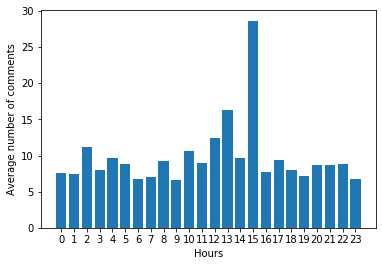

In [34]:
visualize(avg_num_per_hour_ask)

In [35]:
visualize(avg_num_per_hour_show)